# Test Notebook


## Problem 1 Test Set Evaluation

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 

# load test set and labels
X_test = np.load('flower_species_classification/data_test.npy').T
t_test = np.load('flower_species_classification/labels_test.npy')

X_test.shape, t_test.shape

((415, 270000), (415,))

In [7]:
# convert numpy arrays for tensorflow

X_test_rs =  tf.constant(X_test.reshape((X_test.shape[0], 300, 300, 3)),
                        dtype=tf.float32)

X_test_rs.shape, t_test.shape

(TensorShape([415, 300, 300, 3]), (415,))

#### Loading trained model from Problem 1

In [4]:
import joblib 

model_p1 = joblib.load('trained_models/Q1_trainedModel.pkl');

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-09 22:29:34        77229
metadata.json                                  2022-12-09 22:29:34           64
variables.h5                                   2022-12-09 22:29:34    250627128
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\layers\activation_16
......vars
...layers\functional\layers\act

#### Evaluate the accuracy performance of the test set

In [8]:
accuracy_test = model_p1.evaluate(X_test_rs, t_test)

13/13 [==============================] - 25s 2s/step - loss: 1.0877 - accuracy: 0.7952


#### Make test label prediction and report quantitative metrics

In [10]:
from sklearn.metrics import classification_report

y_test = np.argmax(model_p1.predict(X_test_rs), axis=1)

class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

print(classification_report(t_test, y_test, target_names=class_names))

13/13 [==============================] - 25s 2s/step
               precision    recall  f1-score   support

        Roses       0.89      0.65      0.75        48
    Magnolias       0.84      0.86      0.85        44
       Lilies       0.64      0.61      0.62        46
   Sunflowers       1.00      0.92      0.96        36
      Orchids       0.94      0.67      0.78        45
     Marigold       0.86      0.95      0.90        40
     Hibiscus       0.77      0.79      0.78        43
     Firebush       0.79      0.92      0.85        37
       Pentas       0.62      0.97      0.76        32
Bougainvillea       0.73      0.75      0.74        44

     accuracy                           0.80       415
    macro avg       0.81      0.81      0.80       415
 weighted avg       0.81      0.80      0.79       415



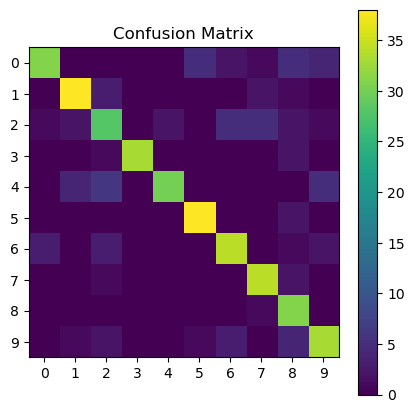

In [12]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
conf_mx = confusion_matrix(t_test, y_test)
plt.imshow(conf_mx)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10));
plt.title('Confusion Matrix');

## Problem 3 Test Set Evaluation

#### Load trained model from problem 3


In [23]:
import joblib 

model_p1 = joblib.load('trained_models/Q3_trainedModel_1.pkl');
model_p2 = joblib.load('trained_models/Q3_trainedModel_2.pkl');
model_p3 = joblib.load('trained_models/Q3_trainedModel_3.pkl');

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-10 13:51:12        11726
metadata.json                                  2022-12-10 13:51:12           64
variables.h5                                   2022-12-10 13:51:12     64599520
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_10
......vars
.........0
.........1
...layers\conv2d_11
......vars
.........0
.........1
...layers\conv2d_12
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\conv2d_6
......vars
.........0
.........1
...layers\conv2d_7
......vars
.........0
.........1
...layers\co

In [7]:
bbox = pd.read_csv('car_detection_dataset/testing_img_names.csv')
# load test set and labels
N = len(bbox) # no. of training samples

# Create a numpy array with all images
for i in range(N): 
    filename='car_detection_dataset/testing_images/'+bbox['image'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    
    if i==0:
        X_test = image_col
    else:
        X_test = np.hstack((X_test, image_col))

# Test feature matrices
X_test = X_test.T

# Test labels
t_test = bbox.drop('image', axis=1).round().to_numpy().astype(int)

X_test.shape, t_test.shape

((175, 770640), (175, 0))

In [9]:
# reshape test set to tensors
X_test_rs = tf.constant(X_test.reshape((X_test.shape[0], 380, 676, 3)),
                        dtype=tf.float32)

#### Make test label prediction and report quantitative metrics

In [47]:
y_test_1 = model_p1.predict(X_test_rs).astype(int)

6/6 [==============================] - 154s 25s/step


In [48]:
y_test_2 = model_p2.predict(X_test_rs).astype(int)

6/6 [==============================] - 155s 25s/step


In [49]:
y_test_3 = model_p3.predict(X_test_rs).astype(int)

6/6 [==============================] - 150s 24s/step


#### model 1 result visualization

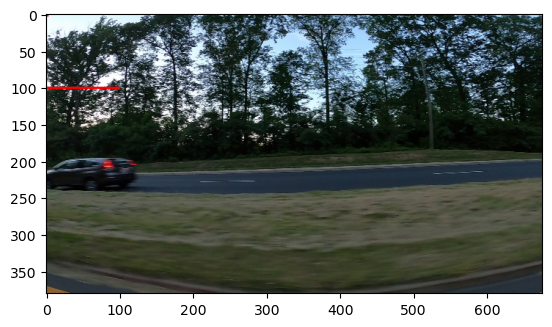

In [50]:
# Example of object visualization using opencv rectangle function
idx=N-1
x= image

plt.imshow(x)
cv2.rectangle(x, (y_test_1[idx][0], y_test_1[idx][1]), 
              (y_test_1[idx][2], y_test_1[idx][3]), 
              (255, 0, 0), 2);

#### model 3 result visualization

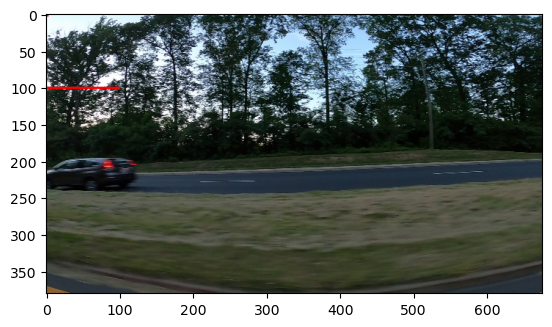

In [51]:
# Example of object visualization using opencv rectangle function
idx=N-1
x= image

plt.imshow(x)
cv2.rectangle(x, (y_test_2[idx][0], y_test_2[idx][1]), 
              (y_test_2[idx][2], y_test_2[idx][3]), 
              (255, 0, 0), 2);

#### model 3 result visualization

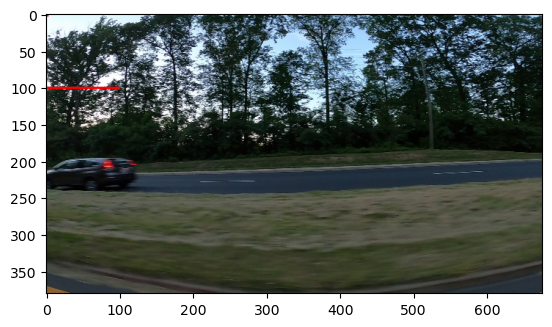

In [52]:
# Example of object visualization using opencv rectangle function
idx=N-1
x= image

plt.imshow(x)
cv2.rectangle(x, (y_test_3[idx][0], y_test_3[idx][1]), 
              (y_test_3[idx][2], y_test_3[idx][3]), 
              (255, 0, 0), 2);

As we can see, the results are not very accurate, which is expected from the large MSE score returned in the training and validation sets.